In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
y=df['Outcome']
features=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
x=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
x.shape,y.shape

((768, 8), (768,))

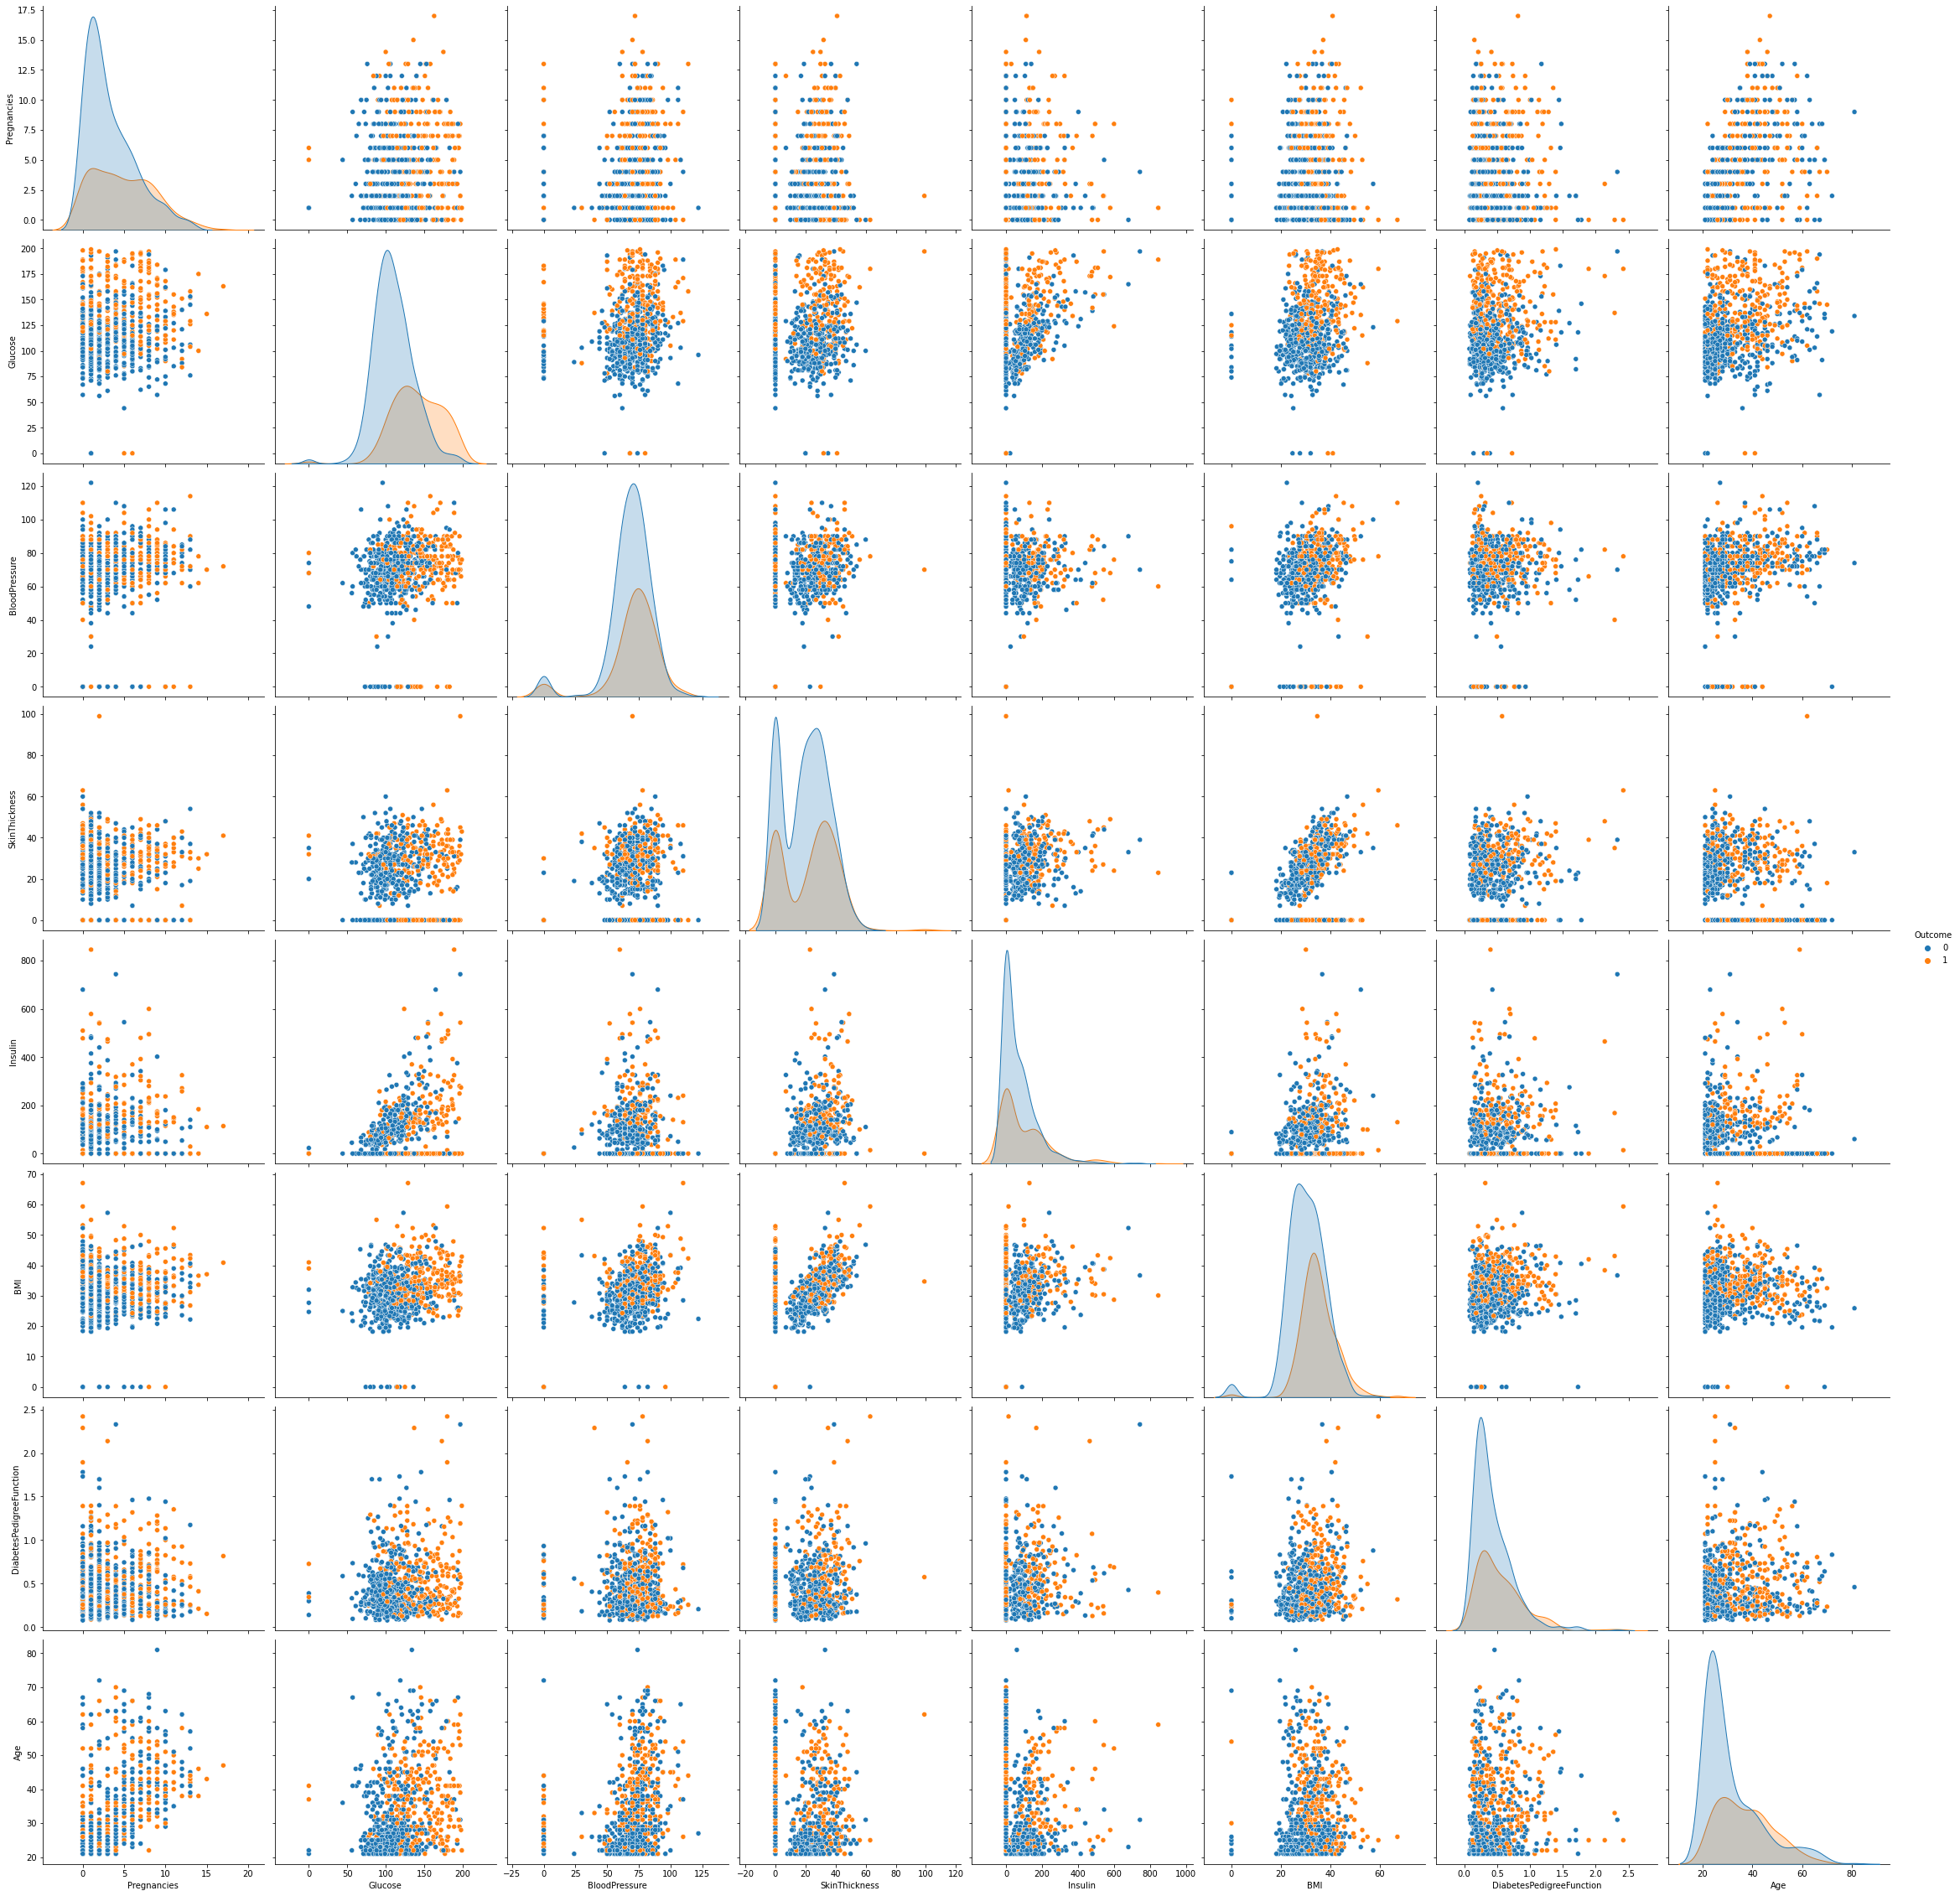

In [28]:
sns.pairplot(df,hue="Outcome",height=4)

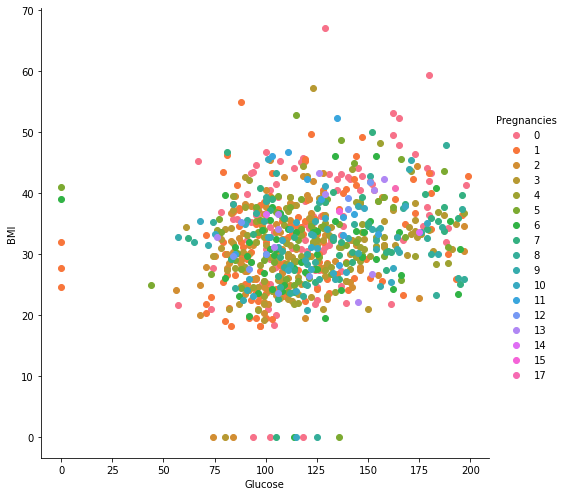

In [37]:
#plot scatterplot
sns.FacetGrid(df,hue="Pregnancies",height=7).map(plt.scatter,"Glucose","BMI").add_legend()

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [16]:
#split dataframe in train and test dataset
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [23]:
min=1
bestK=0
#find best value of k comparing knn classiffier results for different values of k 
for i in  range (1,50):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    
    y_pred_train=neigh.predict(X_train)
    accuracy_train=accuracy_score(y_train, y_pred_train)
    
    y_pred_test=neigh.predict(X_test)
    accuracy_test=accuracy_score(y_test, y_pred_test)

    if(abs(accuracy_train-accuracy_test))<min:
      min=abs(accuracy_train-accuracy_test)
      bestK=i
#to check accuracy for all values of k, uncomment below code
#     print(" "*20,'K value',i)
#     print('*'*50)
#     print('Accuracy for train data ',accuracy_train)
#     print('Accuracy for test data',accuracy_test)
#     print('*'*50)
#     print(' '*50)
print(' '*10,"Best value for K is :",bestK)
print(f'For k= {bestK}, accuracy is :')
neigh = KNeighborsClassifier(n_neighbors=bestK)
neigh.fit(X_train, y_train)
y_pred_train=neigh.predict(X_train)
accuracy_train=accuracy_score(y_train, y_pred_train)
y_pred_test=neigh.predict(X_test)
accuracy_test=accuracy_score(y_test, y_pred_test)
print('Accuracy for train data ',accuracy_train)
print('Accuracy for test data',accuracy_test)



           Best value for K is : 8
For k= 8, accuracy is :
Accuracy for train data  0.7638436482084691
Accuracy for test data 0.7662337662337663


In [39]:
#plot 3D scatter plot
import plotly.express as px
fig=px.scatter_3d(df,x="Insulin",y="BMI",z="BloodPressure",color="Outcome")
fig.show()